# MODULE IMPORT

In [200]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

import re
import matplotlib.pyplot as plt

# DATA IMPORT

In [2]:
data_loc = './Data/Sample_Longlist_Data.xlsx'
data = pd.read_excel(data_loc)

/Users/vishaljha/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


## DATA INFORMATION 

Created a DATA INFO function to display the table head/tail, variance of integer data type columns and missing values in the table to get an initial overview of the dataset.

In [3]:
def data_info(data):
    print('Data Head')
    display(data.head())
    print()

    print('Data Tail')
    display(data.tail())
    print()

    print('Data Shape')    
    display(data.shape)
    print()

    print('Data Info')
    display(data.info())
    print()

    try:
        display(data.select_dtypes(include=['object']).describe())
        print()
    except:
        print('No object data')
        print()
    finally:
        display(data.describe())
        print()
    
    print('Data Nulls')
    display(data.isna().sum())
    print()

    total_missing_values = data.isna().sum().sum()
    total_cells = np.product(data.shape)

    print(f'Total missing values: {total_missing_values}')
    print(f'Total cells: {total_cells}')
    print(f'Percentage of missing values: {total_missing_values / total_cells * 100}')

def data_imputation(X, y=None, strategy='mean'):
    imputer = SimpleImputer(missing_values=np.nan ,strategy=strategy)
    X = imputer.fit(X)
    if y is not None:
        y = imputer.fit(y)
    return X, y

In [4]:
print("DATA INFO")
data_info(data)

DATA INFO
Data Head


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...



Data Tail


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
1834,2020-11-15,Garden,Seller 1835,Seller 1835-link,Seller 1835-storefrontlink,"1-16 of over 2,000 results",83% positive in the last 12 months (46 ratings),ZZM Store is committed to providing each custo...,"Business Name:Shenzhen Xinyile Trading Co., Ltd",Longhuaxinqu Longhuajiedao YousongDiergongyequ...,5,0,9,15,95,76,ZZMUK,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1835,2020-11-15,Garden,Seller 1836,Seller 1836-link,Seller 1836-storefrontlink,"1-16 of over 5,000 results",NaN,ZZMIARY is committed to providing each custome...,Business Name:wujixianzhanpingzongheshangdian,hebeishengshijiazhuangshiwujixiangaotouxiangxi...,0,0,0,0,1,0,Not Applicable,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1836,2020-11-15,Garden,Seller 1837,Seller 1837-link,Seller 1837-storefrontlink,"1-16 of over 10,000 results",0% positive lifetime (1 total ratings),zzshd75 is committed to providing each custome...,Business Name:henanliyanshangmaoyouxiangongsi,lankaoxianzhangjunmuzhenzhengzhuangcunerzukaif...,10,0,0,0,1,1,zwbaobei,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1837,2020-11-15,Garden,Seller 1838,Seller 1838-link,Seller 1838-storefrontlink,1-16 of 473 results,67% positive lifetime (3 total ratings),ZZY xiaodian is committed to providing each cu...,Business Name:shanximinsanyizhuangshijiancaiyo...,bei san huan da ming gong jian cai shi changba...,4,0,0,33,9,1,ZZYXiao,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
1838,2020-11-15,Garden,Seller 1839,Seller 1839-link,Seller 1839-storefrontlink,"1-16 of over 20,000 results",100% positive lifetime (2 total ratings),zzzswbl is committed to providing each custome...,Business Name:nanchangshiyunjianshejizhuangshi...,honggutanxinquhuanandongerlu99haolongxiangyuan...,1,0,0,0,1,1,zzzswbl,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...



Data Shape


(1839, 18)


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller 

None

,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Sample brand name,Sample Brand URL
count,1839,1839,1839,1839,1513,1411,1812,1783,1764,1835,1839
unique,1,1839,1839,1839,394,709,1808,1783,1763,1639,1664
top,Garden,Seller 91,Seller 1168-link,Seller 1651-storefrontlink,"1-16 of over 1,000 results",100% positive lifetime (1 total ratings),The European Commission provides for an Online...,Business Name:Zheng Zhou Shang Zhi Ke Dian Zi ...,xinjiangxianwananzhenximacuncunxinanyunchengsh...,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...
freq,1839,1,1,1,205,134,3,1,2,13,10


,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,6.951060,5.808592,7.632409,12.312670,1399.745514,765.173464
std,6.232073,18.117027,19.902394,23.435871,6204.123987,3817.355945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,15.000000,0.000000,4.000000,14.000000,176.500000,87.500000
max,16.000000,100.000000,100.000000,100.000000,86856.000000,70732.000000



Data Nulls


Date Added                                             0
category                                               0
sellerlink                                             0
sellerlink-url                                         0
sellerstorefront-url                                   0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
Sample Brand URL               


Total missing values: 916
Total cells: 33102
Percentage of missing values: 2.767204398525769


##### Insight
Null values are only present in,
- Seller product count
- Seller ratings
- Seller details
- Seller business name
- Business addresses

Since none of the values fall in the category of data not available and fall in the category of missing data fields. <br>
Thus, data imputation is not possible in any of the fields as value reproduction will cause the data variance balance to be unstable.

# DATA CLEANING

## Exploring data

### Refactoring Seller product count to extract the integer values

In [16]:
test = data['sellerproductcount'][500]

In [17]:
test

'1-16 of 816 results'

In [18]:
test.split()[3]

'results'

In [ ]:
data['sellerproductcount'] = data['sellerproductcount'][0].split()[3]
data.head()

In [28]:
data['sellerproductcount_refactored'] = data['sellerproductcount'].apply(lambda x: x.split()[-2] if type(x) == str and x != np.nan else x)

In [29]:
data['sellerproductcount_refactored']

0       100,000
1           NaN
2         2,000
3           123
4         1,000
         ...   
1834      2,000
1835      5,000
1836     10,000
1837        473
1838     20,000
Name: sellerproductcount_refactored, Length: 1839, dtype: object

In [30]:
data['sellerproductcount']

0       1-16 of over 100,000 results
1                                NaN
2         1-16 of over 2,000 results
3                1-16 of 123 results
4         1-16 of over 1,000 results
                    ...             
1834      1-16 of over 2,000 results
1835      1-16 of over 5,000 results
1836     1-16 of over 10,000 results
1837             1-16 of 473 results
1838     1-16 of over 20,000 results
Name: sellerproductcount, Length: 1839, dtype: object

In [31]:
data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerproductcount_refactored
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,"100,000"
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,"2,000"
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,123
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,"1,000"


##### Insight
Dropping the following columns as they do not provide any relevant information:
- Seller product count - A refactored column to extract the integer values from the Seller product count column added above
- Sample Brand URL - This column is not relevant to decide the viable seller or not
- sellerstorefront-url - No valuable information in the column
- sellerlink-url - No valuable information in the column
- sellerlink - No valuable information in the column
- category - No unique values

In [33]:
drop_cols = ['sellerproductcount', 'Sample Brand URL', 'sellerstorefront-url', 'sellerlink-url', 'sellerlink', 'category']
data.drop(drop_cols, axis=1, inplace=True)

data.head()

,Date Added,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored
0,2020-11-15,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000"
1,2020-11-15,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,NaN
2,2020-11-15,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,"2,000"
3,2020-11-15,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,123
4,2020-11-15,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,"1,000"


### Refactoring Seller business name to extract the business name from the given string

In [35]:
test_bnrf = data['seller business name']
test_bnrf.apply(lambda x: x.split(':')[1] if type(x) == str and x != np.nan else x)

0                                  Lohas Living Inc
1                                 1a-Handelsagentur
2              nantongaohuanfangzhipinyouxiangongsi
3                Zhengzhou Yaoqiong Trading Company
4        shenzhenfeichangshangmeimaoyiyouxiangongsi
                           ...                     
1834              Shenzhen Xinyile Trading Co., Ltd
1835                wujixianzhanpingzongheshangdian
1836                henanliyanshangmaoyouxiangongsi
1837    shanximinsanyizhuangshijiancaiyouxiangongsi
1838      nanchangshiyunjianshejizhuangshigongcheng
Name: seller business name, Length: 1839, dtype: object

In [36]:
data['seller business name refactored'] = data['seller business name'].apply(lambda x: x.split(':')[1] if type(x) == str and x != np.nan else x)
data.head(-5)

,Date Added,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored
0,2020-11-15,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc
1,2020-11-15,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur
2,2020-11-15,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,"2,000",nantongaohuanfangzhipinyouxiangongsi
3,2020-11-15,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,123,Zhengzhou Yaoqiong Trading Company
4,2020-11-15,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,"1,000",shenzhenfeichangshangmeimaoyiyouxiangongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,2020-11-15,NaN,ZYMBH is committed to providing each customer ...,Business Name:AoHanQiXinZhouZhaiYanMeiRiYongBa...,NeiMengGuZAoHanQiXinZhouHuiNingLuBeiXinCeShiYa...,2,0,0,0,1,0,Qazxsw,"10,000",AoHanQiXinZhouZhaiYanMeiRiYongBaiHuoDian
1830,2020-11-15,94% positive in the last 12 months (35 ratings),ZYTrade is committed to providing each custome...,Business Name:guang zhou zhen ye mao yi you xi...,Tian he qu han jing lu 1 haojin xing da sha 5 ...,3,0,0,6,34,27,ZYVoyage,53,guang zhou zhen ye mao yi you xian gong si
1831,2020-11-15,75% positive lifetime (4 total ratings),zyujie is committed to providing each customer...,Business Name:Yiwushixiangxingwangbaozhuangshe...,BeiyuanjiedaoyuzhaikouBqu18dong303shizizhushen...,16,0,0,0,16,12,ZDXR,599,Yiwushixiangxingwangbaozhuangshejiyouxiangongsi
1832,2020-11-15,NaN,ZYWLpp is committed to providing each customer...,Business Name:shanxizhulemaoyiyouxiangongsi,xiaodianqupingyanglu65hao6haolou1212shitaiyuan...,0,0,0,0,0,0,ZYWL,NaN,shanxizhulemaoyiyouxiangongsi


In [37]:
data.drop(['seller business name'], axis=1, inplace=True)
data.head()

,Date Added,sellerratings,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored
0,2020-11-15,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc
1,2020-11-15,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur
2,2020-11-15,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,"2,000",nantongaohuanfangzhipinyouxiangongsi
3,2020-11-15,NaN,7 days home life supermarket is committed to p...,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,123,Zhengzhou Yaoqiong Trading Company
4,2020-11-15,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,"1,000",shenzhenfeichangshangmeimaoyiyouxiangongsi


### Refactoring Seller ratings to extract the rating count, sentiment and rating durations

In [83]:
seller_ratings = data['sellerratings']
seller_ratings.loc[50:100]

50              100% positive lifetime (5 total ratings)
51      95% positive in the last 12 months (221 ratings)
52                                                   NaN
53     95% positive in the last 12 months (4189 ratings)
54      98% positive in the last 12 months (286 ratings)
55              87% positive lifetime (15 total ratings)
56      98% positive in the last 12 months (962 ratings)
57              100% positive lifetime (1 total ratings)
58       95% positive in the last 12 months (88 ratings)
59      90% positive in the last 12 months (146 ratings)
60      96% positive in the last 12 months (163 ratings)
61       28% positive in the last 12 months (50 ratings)
62     98% positive in the last 12 months (1023 ratings)
63              100% positive lifetime (7 total ratings)
64      100% positive in the last 12 months (16 ratings)
65            99% positive lifetime (1138 total ratings)
66      89% positive in the last 12 months (130 ratings)
67             100% positive li

In [226]:
seller_ratings_num = seller_ratings.apply(lambda x: x.split('(')[1] if type(x) == str and x != np.nan else x)
seller_ratings_num = seller_ratings_num.apply(lambda x: x.split()[0] if type(x) == str and x != np.nan else x)
seller_ratings_num

0       118
1       566
2        75
3       NaN
4        52
       ... 
1834     46
1835    NaN
1836      1
1837      3
1838      2
Name: sellerratings, Length: 1839, dtype: object

In [80]:
seller_ratings_sentiment = seller_ratings.apply(lambda x: x.split(' ')[1] if type(x) == str and x != np.nan else x)
seller_ratings_sentiment

0       positive
1       positive
2       positive
3            NaN
4       positive
          ...   
1834    positive
1835         NaN
1836    positive
1837    positive
1838    positive
Name: sellerratings, Length: 1839, dtype: object

In [101]:
seller_ratings_duration = seller_ratings.apply(lambda x: x.split(' ')[5] if type(x) == str and x != np.nan else x)
seller_ratings_duration = seller_ratings_duration.apply(lambda x: 'lifetime' if x == 'ratings)' else x)
seller_ratings_duration.loc[50:100]

50     lifetime
51           12
52          NaN
53           12
54           12
55     lifetime
56           12
57     lifetime
58           12
59           12
60           12
61           12
62           12
63     lifetime
64           12
65     lifetime
66           12
67     lifetime
68     lifetime
69           12
70           12
71           12
72     lifetime
73           12
74     lifetime
75           12
76     lifetime
77           12
78     lifetime
79     lifetime
80     lifetime
81           12
82           12
83           12
84           12
85           12
86           12
87     lifetime
88          NaN
89           12
90     lifetime
91           12
92     lifetime
93           12
94     lifetime
95           12
96     lifetime
97          NaN
98           12
99          NaN
100          12
Name: sellerratings, dtype: object

In [227]:
data['sellerratings_num'] = seller_ratings_num
data['sellerratings_sentiment'] = seller_ratings_sentiment
data['sellerratings_duration'] = seller_ratings_duration

drop_cols = ['sellerratings']
data.drop(drop_cols, axis=1, inplace=True)

data.head()

,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
0,2020-11-15,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,118,positive,12,US,jadgemaello@gmail.com,"[10022-6630, +1208-964-6807, 10022-6630, +1208..."
1,2020-11-15,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur,566,positive,12,DE,info@1a-handelsagentur.de,"[39932-829721, 39932 - 829721]"
2,2020-11-15,15,0,25,12,164,162,TXYFYP,"2,000",nantongaohuanfangzhipinyouxiangongsi,75,positive,12,CN,NaN,NaN
3,2020-11-15,1,0,0,0,0,0,SHIFENG,123,Zhengzhou Yaoqiong Trading Company,NaN,NaN,NaN,CN,NaN,NaN
4,2020-11-15,16,0,31,15,224,113,YUOKI99,"1,000",shenzhenfeichangshangmeimaoyiyouxiangongsi,52,positive,12,CN,NaN,NaN


### Refactoring business address to extract the country code from the given string

In [124]:
test_ba = data['businessaddress']
test_ba[544][-2:]

'DE'

In [127]:
business_country_code = test_ba.apply(lambda x: x[-2:] if type(x) == str and x != np.nan else x)
business_country_code.loc[50:60]

50     CN
51     DE
52     CN
53     DE
54     DE
55     PL
56     DE
57    NaN
58     DE
59     DE
60     DE
Name: businessaddress, dtype: object

In [128]:
data['businessaddress_country_code'] = business_country_code
data.head()

,Date Added,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code
0,2020-11-15,Lohas Living Inc James Mazzello US 845 3RD Ave...,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,88,positive,12,US
1,2020-11-15,Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur,90,positive,12,DE
2,2020-11-15,67878u6i7 is committed to providing each custo...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,"2,000",nantongaohuanfangzhipinyouxiangongsi,85,positive,12,CN
3,2020-11-15,7 days home life supermarket is committed to p...,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,123,Zhengzhou Yaoqiong Trading Company,NaN,NaN,NaN,CN
4,2020-11-15,78 68yui678 is committed to providing each cus...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,"1,000",shenzhenfeichangshangmeimaoyiyouxiangongsi,81,positive,12,CN


### Refactoring Seller details to extract the seller email and phone-number from the given string

In [157]:
test_sd = data['sellerdetails']
email = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", test_sd[110])
print(email)

['info@vronis-kinderland.de']


In [158]:
seller_emails = test_sd.apply(lambda x: re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", x) if type(x) == str and x != np.nan else x)
seller_emails.loc[50:60]

50                                  []
51                [info@kaiser24.shop]
52                                  []
53               [info@kaleidoshop.de]
54                  [info@kalishop.de]
55                                  []
56                   [info@kamdi24.de]
57                                  []
58                                  []
59                                  []
60    [kundenservice@kamin-store24.de]
Name: sellerdetails, dtype: object

In [160]:
seller_emails = seller_emails.apply(lambda x: np.nan if x == [] else x)

In [162]:
seller_emails = seller_emails.apply(lambda x: x[0] if type(x) == list else x)
seller_emails.loc[50:60]

50                               NaN
51                info@kaiser24.shop
52                               NaN
53               info@kaleidoshop.de
54                  info@kalishop.de
55                               NaN
56                   info@kamdi24.de
57                               NaN
58                               NaN
59                               NaN
60    kundenservice@kamin-store24.de
Name: sellerdetails, dtype: object

In [169]:
seller_phone_number = test_sd.apply(lambda x: re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', x) if type(x) == str and x != np.nan else x)
seller_phone_number = seller_phone_number.apply(lambda x: np.nan if x == [] else x)
#seller_phone_number = seller_phone_number.apply(lambda x: x[0] if type(x) == list else x)
seller_phone_number.loc[1:60]

1                        [39932-829721, 39932 - 829721]
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13                                                  NaN
14                                        [15140008562]
15                                                  NaN
16                                                  NaN
17                                                  NaN
18                                              

In [171]:
data['sellerdetails_email'] = seller_emails
data['sellerdetails_phone_number'] = seller_phone_number

drop_cols = ['sellerdetails', 'businessaddress']
data.drop(drop_cols, axis=1, inplace=True)

data.head()

,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
0,2020-11-15,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,88,positive,12,US,jadgemaello@gmail.com,"[10022-6630, +1208-964-6807, 10022-6630, +1208..."
1,2020-11-15,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur,90,positive,12,DE,info@1a-handelsagentur.de,"[39932-829721, 39932 - 829721]"
2,2020-11-15,15,0,25,12,164,162,TXYFYP,"2,000",nantongaohuanfangzhipinyouxiangongsi,85,positive,12,CN,NaN,NaN
3,2020-11-15,1,0,0,0,0,0,SHIFENG,123,Zhengzhou Yaoqiong Trading Company,NaN,NaN,NaN,CN,NaN,NaN
4,2020-11-15,16,0,31,15,224,113,YUOKI99,"1,000",shenzhenfeichangshangmeimaoyiyouxiangongsi,81,positive,12,CN,NaN,NaN


In [176]:
data.shape

(1839, 16)

## Dropping rows whith COUNTRY CODE = 'CN' as Razor group does not acquire company from China

In [229]:
## Drop a row if businessaddress_country_code is CN 
data_dropped_cn = data[data['businessaddress_country_code'] != 'CN']
data_dropped_cn.shape

(602, 16)

In [230]:
data_dropped_cn.head()

,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
0,2020-11-15,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,118,positive,12,US,jadgemaello@gmail.com,"[10022-6630, +1208-964-6807, 10022-6630, +1208..."
1,2020-11-15,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur,566,positive,12,DE,info@1a-handelsagentur.de,"[39932-829721, 39932 - 829721]"
5,2020-11-15,13,0,0,0,3284,2944,Strata,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2020-11-15,15,0,0,3,1446,921,Unbekannt,919,Oliver Mills,116,positive,12,DE,webmaster@9pm-store.de,[15140008562]
19,2020-11-15,0,18,20,20,0,0,Visit the TFA Dostmann Store,NaN,ABC-Schnäppchenmarkt GmbH,3721,positive,12,DE,abc-markt@web.de,NaN


<br>

### Dropping duplicate phone numbers from the columns

In [231]:
seller_phone_number = data_dropped_cn['sellerdetails_phone_number']
seller_phone_number = seller_phone_number.apply(lambda x: x[0] if type(x) == list else x)

seller_phone_number.loc[50:60]

51             20260937540
53                     NaN
54                     NaN
55                     NaN
56    +49-(0)351-259300-11
57                     NaN
58                     NaN
59             46628917345
60            9363-9977217
Name: sellerdetails_phone_number, dtype: object

In [232]:
data_dropped_cn['sellerdetails_phone_number'] = seller_phone_number
data_dropped_cn.head()

/Users/vishaljha/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
0,2020-11-15,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,118,positive,12,US,jadgemaello@gmail.com,10022-6630
1,2020-11-15,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur,566,positive,12,DE,info@1a-handelsagentur.de,39932-829721
5,2020-11-15,13,0,0,0,3284,2944,Strata,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2020-11-15,15,0,0,3,1446,921,Unbekannt,919,Oliver Mills,116,positive,12,DE,webmaster@9pm-store.de,15140008562
19,2020-11-15,0,18,20,20,0,0,Visit the TFA Dostmann Store,NaN,ABC-Schnäppchenmarkt GmbH,3721,positive,12,DE,abc-markt@web.de,NaN


##### Comment
Saving the cleaned and processed as a csv file for further analysis.

In [233]:
data_dropped_cn.to_csv('data_cleaned.csv')

# DATA ANALYSIS

Importing the data into a dataframe and performing data analysis.

In [271]:
d_type = {
    'Count of seller brands' : 'int64',
    'Max % of negative seller ratings - last 30 days' : 'int64',
    'Max % of negative seller ratings - last 90 days' : 'int64',
    'Max % of negative seller ratings - last 12 months' : 'int64',
    'Hero Product 1 #ratings' : 'int64',
    'Hero Product 2 #ratings' : 'int64',
    'Sample brand name' : 'category',
    'sellerproductcount_refactored' : 'int64',
    'seller business name refactored' : 'category',
    'sellerratings_num' : 'int64',
    'sellerratings_sentiment' : 'category',
    'sellerratings_duration' : 'int64',
    'businessaddress_country_code' : 'category',
    'sellerdetails_email' : 'category',
    'sellerdetails_phone_number' : 'category'
}
data_clean = pd.read_csv('data_cleaned.csv', parse_dates=['Date Added'])
data_clean.head()

,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
0,0,2020-11-15,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,118.0,positive,12,US,jadgemaello@gmail.com,10022-6630
1,1,2020-11-15,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur,566.0,positive,12,DE,info@1a-handelsagentur.de,39932-829721
2,5,2020-11-15,13,0,0,0,3284,2944,Strata,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,2020-11-15,15,0,0,3,1446,921,Unbekannt,919,Oliver Mills,116.0,positive,12,DE,webmaster@9pm-store.de,15140008562
4,19,2020-11-15,0,18,20,20,0,0,Visit the TFA Dostmann Store,NaN,ABC-Schnäppchenmarkt GmbH,3721.0,positive,12,DE,abc-markt@web.de,NaN


##### Comment
Checking if any columns are parsed with wrong data types.

In [272]:
data_clean.dtypes

Unnamed: 0                                                    int64
Date Added                                           datetime64[ns]
Count of seller brands                                        int64
Max % of negative seller ratings - last 30 days               int64
Max % of negative seller ratings - last 90 days               int64
Max % of negative seller ratings - last 12 months             int64
Hero Product 1 #ratings                                       int64
Hero Product 2 #ratings                                       int64
Sample brand name                                            object
sellerproductcount_refactored                                object
seller business name refactored                              object
sellerratings_num                                           float64
sellerratings_sentiment                                      object
sellerratings_duration                                       object
businessaddress_country_code                    

<AxesSubplot:>

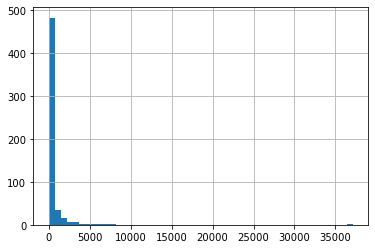

In [273]:
## Plot a histogram of the sellerratings_num
data_clean['sellerratings_num'].hist(bins=50)

##### Comment
Majority of companies have zero seller ratings on their page.

## DATA INFO to get an initial overview of the cleaned dataset before performing further operations on it.

In [274]:
data_info(data_clean)

Data Head


,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
0,0,2020-11-15,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,118.0,positive,12,US,jadgemaello@gmail.com,10022-6630
1,1,2020-11-15,0,2,2,9,0,0,Visit the tesa Store,NaN,1a-Handelsagentur,566.0,positive,12,DE,info@1a-handelsagentur.de,39932-829721
2,5,2020-11-15,13,0,0,0,3284,2944,Strata,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,2020-11-15,15,0,0,3,1446,921,Unbekannt,919,Oliver Mills,116.0,positive,12,DE,webmaster@9pm-store.de,15140008562
4,19,2020-11-15,0,18,20,20,0,0,Visit the TFA Dostmann Store,NaN,ABC-Schnäppchenmarkt GmbH,3721.0,positive,12,DE,abc-markt@web.de,NaN



Data Tail


,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
597,1808,2020-11-15,8,0,0,0,65,41,NOLA,52,AD-ACCESS-Zündholz Riesa GmbH,16.0,positive,12,DE,NaN,NaN
598,1813,2020-11-15,15,0,0,0,91,18,Rice,177,DE815289413,10.0,positive,12,NaN,info@zurrosakuh.de,NaN
599,1814,2020-11-15,15,6,8,7,636,466,Star-Max,"1,000",Reinhard Joormann -FansandTrends- e.K.,3075.0,positive,12,DE,r.joormann@googlemail.com,23626057826
600,1815,2020-11-15,16,0,0,0,27269,11333,Versele-Laga,"2,000",Zwoofer.com,4.0,positive,lifetime,NL,NaN,NaN
601,1828,2020-11-15,0,0,0,0,0,0,XDLH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data Shape


(602, 17)


Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Unnamed: 0                                         602 non-null    int64         
 1   Date Added                                         602 non-null    datetime64[ns]
 2   Count of seller brands                             602 non-null    int64         
 3   Max % of negative seller ratings - last 30 days    602 non-null    int64         
 4   Max % of negative seller ratings - last 90 days    602 non-null    int64         
 5   Max % of negative seller ratings - last 12 months  602 non-null    int64         
 6   Hero Product 1 #ratings                            602 non-null    int64         
 7   Hero Product 2 #ratings                            602 non-null    int64         
 8   Sample br

None

,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
count,602,481,546,559,559,527,308,281
unique,486,235,546,1,2,20,308,280
top,Visit the tesa Store,"1,000",AD-ACCESS-Zündholz Riesa GmbH,positive,12,DE,amazon@x-comics.de,+49 (0)8544
freq,8,50,1,559,453,364,1,2


,Unnamed: 0,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,sellerratings_num
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.00000,602.000000,559.000000
mean,646.034884,9.513289,5.310631,5.735880,7.303987,4110.52990,2271.294020,462.515206
std,445.277285,6.736593,14.626857,12.610972,13.999249,10315.68045,6414.703705,1824.115487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,251.250000,1.000000,0.000000,0.000000,0.000000,5.00000,2.000000,21.000000
50%,636.000000,14.000000,0.000000,0.000000,3.000000,456.50000,225.500000,82.000000
75%,877.750000,15.000000,3.000000,6.000000,8.000000,2980.25000,1734.000000,280.000000
max,1828.000000,16.000000,100.000000,100.000000,100.000000,86856.00000,70732.000000,37124.000000



Data Nulls


Unnamed: 0                                             0
Date Added                                             0
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      0
sellerproductcount_refactored                        121
seller business name refactored                       56
sellerratings_num                                     43
sellerratings_sentiment                               43
sellerratings_duration                                43
businessaddress_country_code                          75
sellerdetails_email                                  294
sellerdetails_phone_number                           321
dtype: int64


Total missing values: 996
Total cells: 10234
Percentage of missing values: 9.732264999022865


##### Insight
The cleaned data set has 9.7% (996 cells) of missing values in the table, which is higher than the percentage of missing values in the original data set.<br>
Now, the columns with missing values are:
- Seller product count
- Seller business name
- Seller ratings nums
- Seller ratings sentiment
- Seller ratings durations
- Seller country code
- Seller email
- Seller phone number

<br>The number of rows with missing values have incresed from the original dataset.

##### Insight
Now, we are dropping rows with NaN values in the following columns:
- Seller product count
- Seller rating number
<br><br>

If we do not have values in these columns, we cannot determine the viability of the seller as their sales report is not complete.

In [275]:
## Drop rows with NaN values in sellerratings_num and sellerproductcount_refactored
data_clean_dropna = data_clean.dropna(subset=['sellerratings_num', 'sellerproductcount_refactored'])
data_clean_dropna.shape

(469, 17)

In [276]:
data_info(data_clean_dropna)

Data Head


,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
0,0,2020-11-15,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,"100,000",Lohas Living Inc,118.0,positive,12,US,jadgemaello@gmail.com,10022-6630
3,14,2020-11-15,15,0,0,3,1446,921,Unbekannt,919,Oliver Mills,116.0,positive,12,DE,webmaster@9pm-store.de,15140008562
7,22,2020-11-15,16,0,0,0,10538,8293,Visit the Seville Classics Store,"40,000",MADEWELL SUPPLY INC,10.0,positive,12,US,NaN,NaN
8,23,2020-11-15,15,15,12,10,30139,11182,Visit the tesa Store,"100,000",Blumenbecker Industriebedarf GmbH,3134.0,positive,12,DE,bib.beckum@blumenbecker.com,99-107 59269
9,24,2020-11-15,15,3,1,2,3286,3079,Neudorff,"3,000",Jörg Müller & Petra Scheerer GbR,610.0,positive,12,DE,NaN,NaN



Data Tail


,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
596,1798,2020-11-15,2,0,0,0,2,0,zsxaaasdf,"40,000",NaN,3.0,positive,lifetime,NaN,NaN,NaN
597,1808,2020-11-15,8,0,0,0,65,41,NOLA,52,AD-ACCESS-Zündholz Riesa GmbH,16.0,positive,12,DE,NaN,NaN
598,1813,2020-11-15,15,0,0,0,91,18,Rice,177,DE815289413,10.0,positive,12,NaN,info@zurrosakuh.de,NaN
599,1814,2020-11-15,15,6,8,7,636,466,Star-Max,"1,000",Reinhard Joormann -FansandTrends- e.K.,3075.0,positive,12,DE,r.joormann@googlemail.com,23626057826
600,1815,2020-11-15,16,0,0,0,27269,11333,Versele-Laga,"2,000",Zwoofer.com,4.0,positive,lifetime,NL,NaN,NaN



Data Shape


(469, 17)


Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 600
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Unnamed: 0                                         469 non-null    int64         
 1   Date Added                                         469 non-null    datetime64[ns]
 2   Count of seller brands                             469 non-null    int64         
 3   Max % of negative seller ratings - last 30 days    469 non-null    int64         
 4   Max % of negative seller ratings - last 90 days    469 non-null    int64         
 5   Max % of negative seller ratings - last 12 months  469 non-null    int64         
 6   Hero Product 1 #ratings                            469 non-null    int64         
 7   Hero Product 2 #ratings                            469 non-null    int64         
 8   Sample br

None

,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
count,469,469,448,469,469,433,254,233
unique,388,229,448,1,2,19,254,233
top,Visit the TFA Dostmann Store,"1,000",Luca Lifestyle B.V.,positive,12,DE,graefebau@aol.com,16096330391
freq,7,50,1,469,373,302,1,1


,Unnamed: 0,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,sellerratings_num
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,637.238806,11.972281,5.637527,6.040512,7.908316,5233.004264,2888.498934,352.144989
std,477.027601,5.289612,15.196742,13.152965,14.626625,11429.155138,7141.660749,866.474944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,217.000000,9.000000,0.000000,0.000000,0.000000,180.000000,101.000000,18.000000
50%,594.000000,15.000000,0.000000,0.000000,3.000000,1155.000000,503.000000,73.000000
75%,910.000000,16.000000,4.000000,7.000000,8.000000,5200.000000,2568.000000,236.000000
max,1815.000000,16.000000,100.000000,100.000000,100.000000,86856.000000,70732.000000,7465.000000



Data Nulls


Unnamed: 0                                             0
Date Added                                             0
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      0
sellerproductcount_refactored                          0
seller business name refactored                       21
sellerratings_num                                      0
sellerratings_sentiment                                0
sellerratings_duration                                 0
businessaddress_country_code                          36
sellerdetails_email                                  215
sellerdetails_phone_number                           236
dtype: int64


Total missing values: 508
Total cells: 7973
Percentage of missing values: 6.371503825410761


##### Comment
After completing the above operation of dropping rows with NaN values, we have a dataset with 6.3% of missing values in the table.<br>
The number of rows with missing values have decreases.
<br>
The missing values are now present in seller informations only, and in business name.

In [277]:
## Print rows with NaN businessaddress_country_code
data_clean_dropna[data_clean_dropna['businessaddress_country_code'].isnull()]

,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
27,57,2020-11-15,14,0,0,0,242,101,TermaTech,21,DE332440907,1.0,positive,lifetime,NaN,NaN,NaN
39,72,2020-11-15,0,0,0,0,1,1,Tarfy,"10,000",NaN,1.0,positive,lifetime,NaN,NaN,NaN
40,73,2020-11-15,16,0,0,3,79,58,Pluto Produkter,693,DE169749227,33.0,positive,12,NaN,kathrin@salzlampe.de,33 3007 0024 0620 1321 00
61,116,2020-11-15,14,0,0,0,333,136,Martinez Albainox,919,DE325278981,36.0,positive,12,NaN,verkauf@kiezbude24.de,+49 (0) 160 - 98681497
127,215,2020-11-15,1,0,0,20,10,9,Kunst-Werk,3,NaN,12.0,positive,lifetime,NaN,NaN,NaN
133,223,2020-11-15,15,0,0,1,2029,778,Stihl,636,DE294778357,350.0,positive,12,NaN,verkauf@luxzina.com,35428898468
155,260,2020-11-15,1,0,0,0,51,49,Visit the Natinos Store,4,DE322640900,19.0,positive,12,NaN,info@natinos.de,15114949348
174,306,2020-11-15,3,0,100,100,0,0,ZMHS,561,NaN,1.0,positive,lifetime,NaN,NaN,NaN
209,444,2020-11-15,2,0,0,0,2,2,Plsdx,"100,000",NaN,7.0,positive,lifetime,NaN,NaN,NaN
213,460,2020-11-15,1,0,100,100,1,0,Rtosd,"80,000",NaN,3.0,positive,lifetime,NaN,NaN,NaN


##### Insight
From the above data display where country code are null, we notice that the business names have the country code present in them.<br>
Thus, we extract the country code from the business name and place it in the country code column.

In [278]:
## If businessaddress_country_code is NaN, fill it with alphabets in seller business name refactored
data_clean_dropna['businessaddress_country_code'].fillna(data_clean_dropna['seller business name refactored'].str[-2:], inplace=True)

/Users/vishaljha/anaconda3/envs/ai/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


##### Insight
From the above performed data information function, we can see that the mean value of the seller ratings number is 352.144989. <br>
Thus, we drop the rows with below mean values in the seller ratings number column so that we can have a list of companies with above mean values in the seller ratings number column, which is the most important factor to determine the viability of the seller.

In [279]:
## Drop rows if sellerratings_num < 352.144989
data_clean_dropna = data_clean_dropna[data_clean_dropna['sellerratings_num'] >= 352.144989]
data_clean_dropna.shape

(88, 17)

In [280]:
data_clean_dropna.head()

,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
8,23,2020-11-15,15,15,12,10,30139,11182,Visit the tesa Store,"100,000",Blumenbecker Industriebedarf GmbH,3134.0,positive,12,DE,bib.beckum@blumenbecker.com,99-107 59269
9,24,2020-11-15,15,3,1,2,3286,3079,Neudorff,"3,000",Jörg Müller & Petra Scheerer GbR,610.0,positive,12,DE,NaN,NaN
10,25,2020-11-15,15,1,1,1,2128,1759,Nexa Lotte,"2,000",boni-shop.com OHG,1488.0,positive,12,DE,amazon@boni-shop.com,4221 45 777 00
13,30,2020-11-15,6,0,1,1,764,599,Visit the Deine Gartenwelt Store,"1,000",Daniel Vogeley und Christopher Gemander GbR,1739.0,positive,12,DE,info@deinegartenwelt.de,22342509631
18,35,2020-11-15,15,18,11,12,7145,2111,Oregon,"10,000",International Systems and Equipment Ltd.,891.0,positive,12,IE,NaN,NaN


##### Insight
From the above performed data information function, we can see that the mean value of the Hero Product 1 ratings is 11429.155138, and Hero Product 2 ratings is 7141.660749. <br>
Thus, we drop the rows with below mean values in the Hero Product 1 ratings and Hero Product 2 ratings column so that we can have a list of companies with above mean values in the Hero Product 1 ratings and Hero Product 2 ratings column. <br>It drops the rows with low ratings in both the Hero Product 1 and Hero Product 2 ratings.

In [281]:
## Drop rows if Hero Product 1 #ratings < 11429.155138 and Hero Product 2 #ratings < 7141.660749
data_clean_dropna = data_clean_dropna[data_clean_dropna['Hero Product 1 #ratings'] >= 11429.155138]
data_clean_dropna = data_clean_dropna[data_clean_dropna['Hero Product 2 #ratings'] >= 7141.660749]
data_clean_dropna.shape

(14, 17)

In [282]:
data_clean_dropna.loc[:]

,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
8,23,2020-11-15,15,15,12,10,30139,11182,Visit the tesa Store,"100,000",Blumenbecker Industriebedarf GmbH,3134.0,positive,12,DE,bib.beckum@blumenbecker.com,99-107 59269
19,36,2020-11-15,15,7,8,8,40683,18910,Visit the Vileda Store,"50,000",itenga GmbH,5150.0,positive,12,DE,info@itenga.de,NaN
23,53,2020-11-15,16,6,5,4,40684,10339,Visit the TFA Dostmann Store,"8,000",Kaleido.Shop GmbH,4189.0,positive,12,DE,info@kaleidoshop.de,NaN
51,100,2020-11-15,16,3,3,2,47337,32420,Visit the Varta Store,"7,000",Kessler electronic GmbH,3416.0,positive,12,DE,info@kessler-electronic.de,49 (0)2273
112,186,2020-11-15,16,8,6,4,11439,9068,Visit the Westmark Store,"1,000",Krinke Kochen und Schenken,601.0,positive,12,DE,schachkri@aol.com,6245 9955738
181,322,2020-11-15,16,3,9,6,71673,58332,Visit the Swiffer Store,"30,000",Milovan Stojkovic,699.0,positive,12,DE,info@limuno.com,8 00 38 03
193,386,2020-11-15,15,6,9,9,19281,11904,Gebol,"10,000",Johann Haslberger,1410.0,positive,12,DE,NaN,NaN
347,712,2020-11-15,15,16,22,22,13490,11284,Visit the Technoline Store,"200,000",TRADEINN RETAIL SERVICES SL,2251.0,positive,12,ES,NaN,NaN
359,726,2020-11-15,16,8,9,9,40681,13311,Visit the tesa Store,"40,000",trendmile GmbH,7242.0,positive,12,DE,support@trendmile.com,951326 - 0
424,837,2020-11-15,16,15,18,20,32420,30140,actiTube,"2,000",Swen Bierschneider,415.0,positive,12,DE,77bier@web.de,NaN


##### Comment
Now we sort the data based on the seller ratings number column in descending order to get the top 10 companies with the highest seller ratings number.

In [283]:
## Sort by sellerratings_num, descending
data_clean_dropna = data_clean_dropna.sort_values(by=['sellerratings_num'], ascending=False)
data_clean_dropna.loc[:]

,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_num,sellerratings_sentiment,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
359,726,2020-11-15,16,8,9,9,40681,13311,Visit the tesa Store,"40,000",trendmile GmbH,7242.0,positive,12,DE,support@trendmile.com,951326 - 0
455,882,2020-11-15,15,5,4,4,66776,32420,Visit the Varta Store,"4,000",Vitamed Matthias Quinger e.K.,6086.0,positive,12,DE,service@vitamed-quinger.com,+4962369329325
19,36,2020-11-15,15,7,8,8,40683,18910,Visit the Vileda Store,"50,000",itenga GmbH,5150.0,positive,12,DE,info@itenga.de,NaN
23,53,2020-11-15,16,6,5,4,40684,10339,Visit the TFA Dostmann Store,"8,000",Kaleido.Shop GmbH,4189.0,positive,12,DE,info@kaleidoshop.de,NaN
51,100,2020-11-15,16,3,3,2,47337,32420,Visit the Varta Store,"7,000",Kessler electronic GmbH,3416.0,positive,12,DE,info@kessler-electronic.de,49 (0)2273
8,23,2020-11-15,15,15,12,10,30139,11182,Visit the tesa Store,"100,000",Blumenbecker Industriebedarf GmbH,3134.0,positive,12,DE,bib.beckum@blumenbecker.com,99-107 59269
347,712,2020-11-15,15,16,22,22,13490,11284,Visit the Technoline Store,"200,000",TRADEINN RETAIL SERVICES SL,2251.0,positive,12,ES,NaN,NaN
193,386,2020-11-15,15,6,9,9,19281,11904,Gebol,"10,000",Johann Haslberger,1410.0,positive,12,DE,NaN,NaN
525,1045,2020-11-15,15,0,17,27,31425,13496,Renuwell,"10,000",Wohn-Idee24-cr UG,1407.0,positive,12,DE,amazon@wohn-idee24.de,2431 9569550
181,322,2020-11-15,16,3,9,6,71673,58332,Visit the Swiffer Store,"30,000",Milovan Stojkovic,699.0,positive,12,DE,info@limuno.com,8 00 38 03


##### Comment
Now, we drop the rows with the rows with following conditions:
- Max % of negative seller ratings - last 12 months - is less than 14%
- Max % of negative seller ratings - last 90 days - is less than 10%
- Max % of negative seller ratings - last 30 days - is less than 10%
<br><br>
This drops the rows with the higher negative seller ratings.

In [313]:
## Drop rows with Max % of negative seller ratings - last 12 months > 13.8
data_clean_analysed = data_clean_dropna[data_clean_dropna['Max % of negative seller ratings - last 12 months'] <= 14]
data_clean_analysed = data_clean_dropna[data_clean_dropna['Max % of negative seller ratings - last 90 days'] <= 10]
data_clean_analysed = data_clean_dropna[data_clean_dropna['Max % of negative seller ratings - last 30 days'] <= 10]

data_clean_analysed.shape

(9, 17)

Fix the errors in sample brand names by extracting the business name from the sample brand name string.

In [314]:
## If Sample brand name length is greater than 2 words split it and drop the first 2 characters
data_clean_analysed['Sample brand name'] = data_clean_analysed['Sample brand name'].apply(lambda x: x.split(' ')[2:] if len(x.split(' ')) > 2 else x)
data_clean_analysed['Sample brand name'] = data_clean_analysed['Sample brand name'].apply(lambda x: x[0] if type(x) == list else x)

/Users/vishaljha/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishaljha/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Comment
Seller sentiment is dropped as there are no unique values in the column.

In [318]:
## Drop sellerratings_sentiment column
data_clean_analysed.drop(['sellerratings_sentiment'], axis=1, inplace=True)

# CONCLUSION

In [319]:
data_clean_analysed.loc[:]

,Unnamed: 0,Date Added,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,sellerproductcount_refactored,seller business name refactored,sellerratings_duration,businessaddress_country_code,sellerdetails_email,sellerdetails_phone_number
359,726,2020-11-15,16,8,9,9,40681,13311,tesa,"40,000",trendmile GmbH,12,DE,support@trendmile.com,951326 - 0
455,882,2020-11-15,15,5,4,4,66776,32420,Varta,"4,000",Vitamed Matthias Quinger e.K.,12,DE,service@vitamed-quinger.com,+4962369329325
19,36,2020-11-15,15,7,8,8,40683,18910,Vileda,"50,000",itenga GmbH,12,DE,info@itenga.de,NaN
23,53,2020-11-15,16,6,5,4,40684,10339,TFA,"8,000",Kaleido.Shop GmbH,12,DE,info@kaleidoshop.de,NaN
51,100,2020-11-15,16,3,3,2,47337,32420,Varta,"7,000",Kessler electronic GmbH,12,DE,info@kessler-electronic.de,49 (0)2273
193,386,2020-11-15,15,6,9,9,19281,11904,Gebol,"10,000",Johann Haslberger,12,DE,NaN,NaN
181,322,2020-11-15,16,3,9,6,71673,58332,Swiffer,"30,000",Milovan Stojkovic,12,DE,info@limuno.com,8 00 38 03
112,186,2020-11-15,16,8,6,4,11439,9068,Westmark,"1,000",Krinke Kochen und Schenken,12,DE,schachkri@aol.com,6245 9955738
510,985,2020-11-15,16,3,5,4,40684,13311,TFA,"100,000","Schreibwaren Wegmann, Inh. Janos Metz e.K.",12,DE,info@schreibwaren-wegmann.de,9922609490


### Insights from the data analysis:
<br>
<br>
Now, we have a dataset with 9 companies which are identified as the best or most promising sellers in this dataset, that the Acquisitions team at Razor should reach out to, and acquire.<br>
The above companies are selected on the basis of the following criteria:
- Low percentage of negative seller ratings, which implies that the seller is not a bad seller.
- - Negative Seller ratings number - last 12 months - is less than or equal to 14%
- - Neutral Seller ratings number - last 90 days - is less than or equal to 10%
- - Negative Seller ratings number - last 30 days - is less than or equal to 10%
- High numbers of reviews on the seller's page, which implies that the seller has a good reputation and a wide customer base. Even if the seller has a slightly lower rating, the number of reviews on the seller's page is a good indicator of the seller's reputation and has scope of improvement in the future.
- - Number of reviews is greater than the mean value of the number of reviews
- Sellers from China are not selected as per company criteria.